# 2 Statistical Learning: Exercícios aplicados

In [98]:
# baixa todos os arquivos necessários para o curso
# pip install ISLP
import numpy as np
import pandas as pd
import ISLP
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**8. Este exercício está relacionado ao conjunto de dados *College*, que pode ser encontrado no arquivo *College.csv* no site do livro. Ele contém várias variáveis para 777 universidades e faculdades diferentes nos Estados Unidos. As variáveis são:**

- **Private**: Indicador público/privado
- **Apps**: Número de inscrições recebidas
- **Accept**: Número de candidatos aceitos
- **Enroll**: Número de novos estudantes matriculados
- **Top10perc**: Novos estudantes do top 10% da classe do ensino médio
- **Top25perc**: Novos estudantes do top 25% da classe do ensino médio
- **F.Undergrad**: Número de alunos de graduação em tempo integral
- **P.Undergrad**: Número de alunos de graduação em meio período
- **Outstate**: Mensalidade para alunos de fora do estado
- **Room.Board**: Custos de moradia e alimentação
- **Books**: Custos estimados de livros
- **Personal**: Gastos pessoais estimados
- **PhD**: Percentual de docentes com doutorado
- **Terminal**: Percentual de docentes com grau terminal
- **S.F.Ratio**: Relação aluno/docente
- **perc.alumni**: Percentual de ex-alunos que fazem doações
- **Expend**: Gasto com instrução por aluno
- **Grad.Rate**: Taxa de graduação

Antes de ler os dados no Python, eles podem ser visualizados no Excel ou em um editor de texto.

**(a) Use a função `pd.read_csv()` para ler os dados no Python. Nomeie os dados carregados como `college`. Certifique-se de que o diretório esteja definido para a localização correta dos dados.**


In [13]:
college = pd.read_csv('College.csv')

In [14]:
college.head(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


**(b) Dê uma olhada nos dados usados no notebook criando e executando uma nova célula de código contendo apenas o código `college`. Você deve perceber que a primeira coluna é apenas o nome de cada universidade em uma coluna chamada algo como Unnamed: 0. Na realidade, não queremos que o Pandas trate isso como dados. No entanto, pode ser útil ter esses nomes para mais tarde. Experimente os seguintes comandos e observe também os data frames resultantes:**


In [15]:
college2 = pd.read_csv('College.csv', index_col= 0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3= college3.set_index('College')

In [16]:
college= college3

**(c) Utilize o método `describe()` para gerar um resumo numérico das variáveis no conjunto de dados.**

In [17]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


**(d) Utilize a função `pd.plotting.scatter_matrix()` para criar uma matriz de gráficos de dispersão das primeiras colunas `[Top10perc, Apps, Enroll]`. Lembre-se de que é possível fazer referência a uma lista C de colunas de um dataframe A usando A[C].**

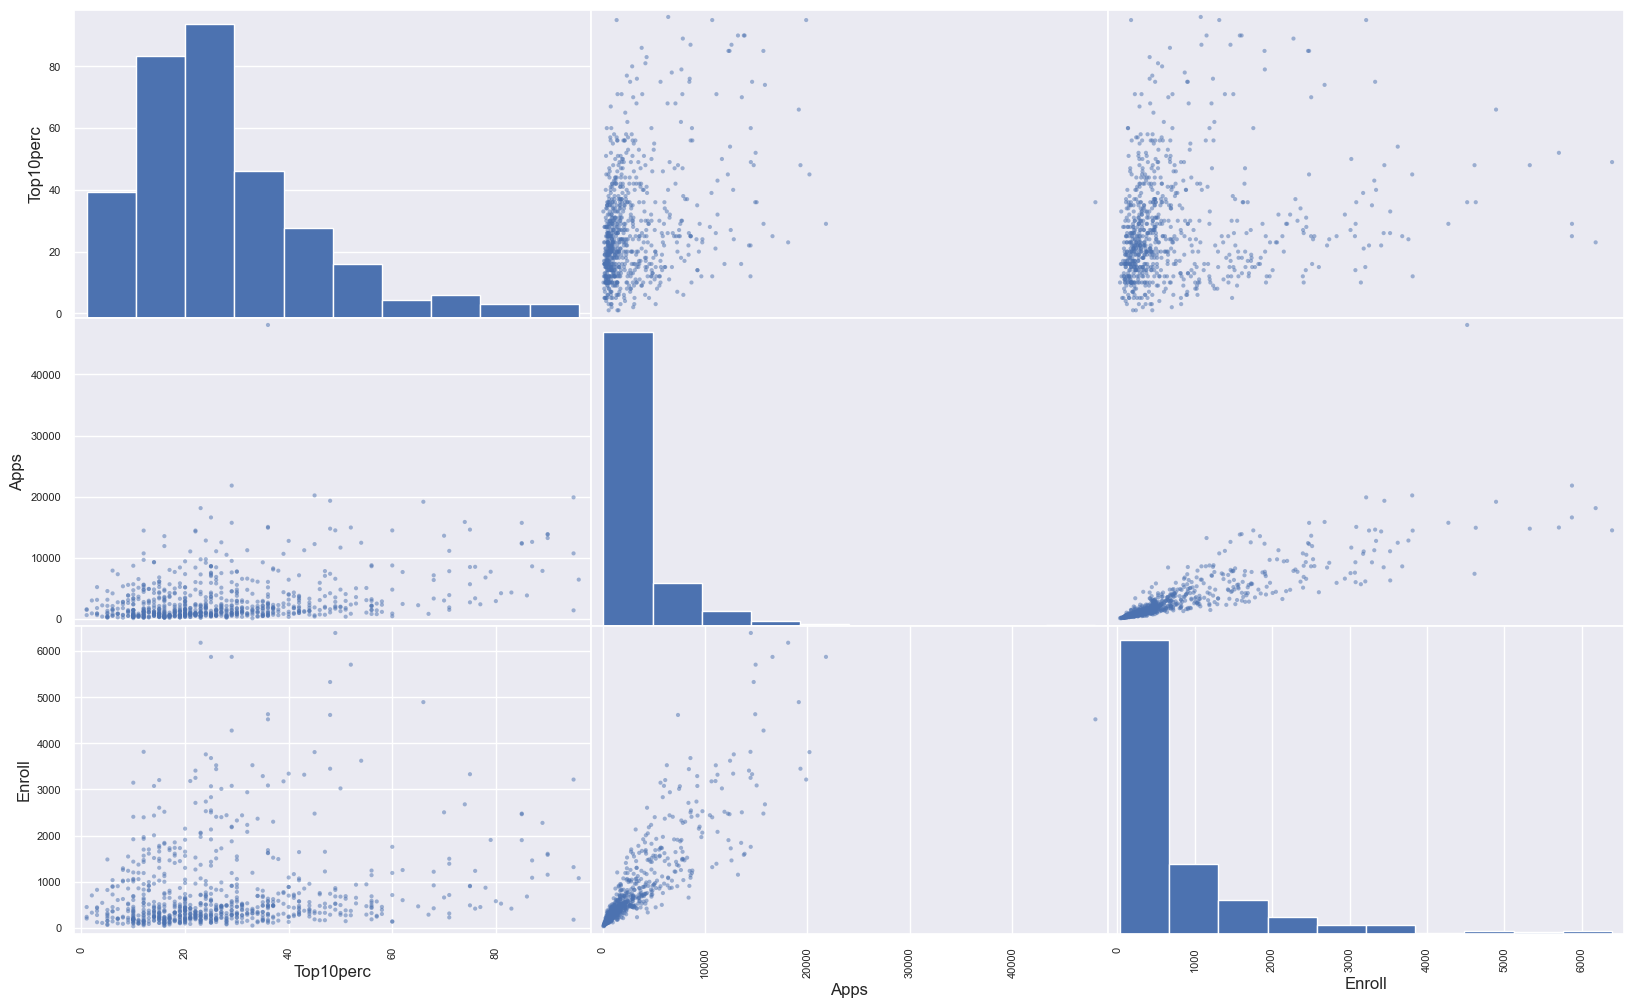

In [92]:
pd.plotting.scatter_matrix(college[['Top10perc',
                                    'Apps',
                                    'Enroll']]);

**(e) Utilize o método `boxplot()` do dataframe college para criar gráficos de caixa lado a lado de Outstate versus Private.**

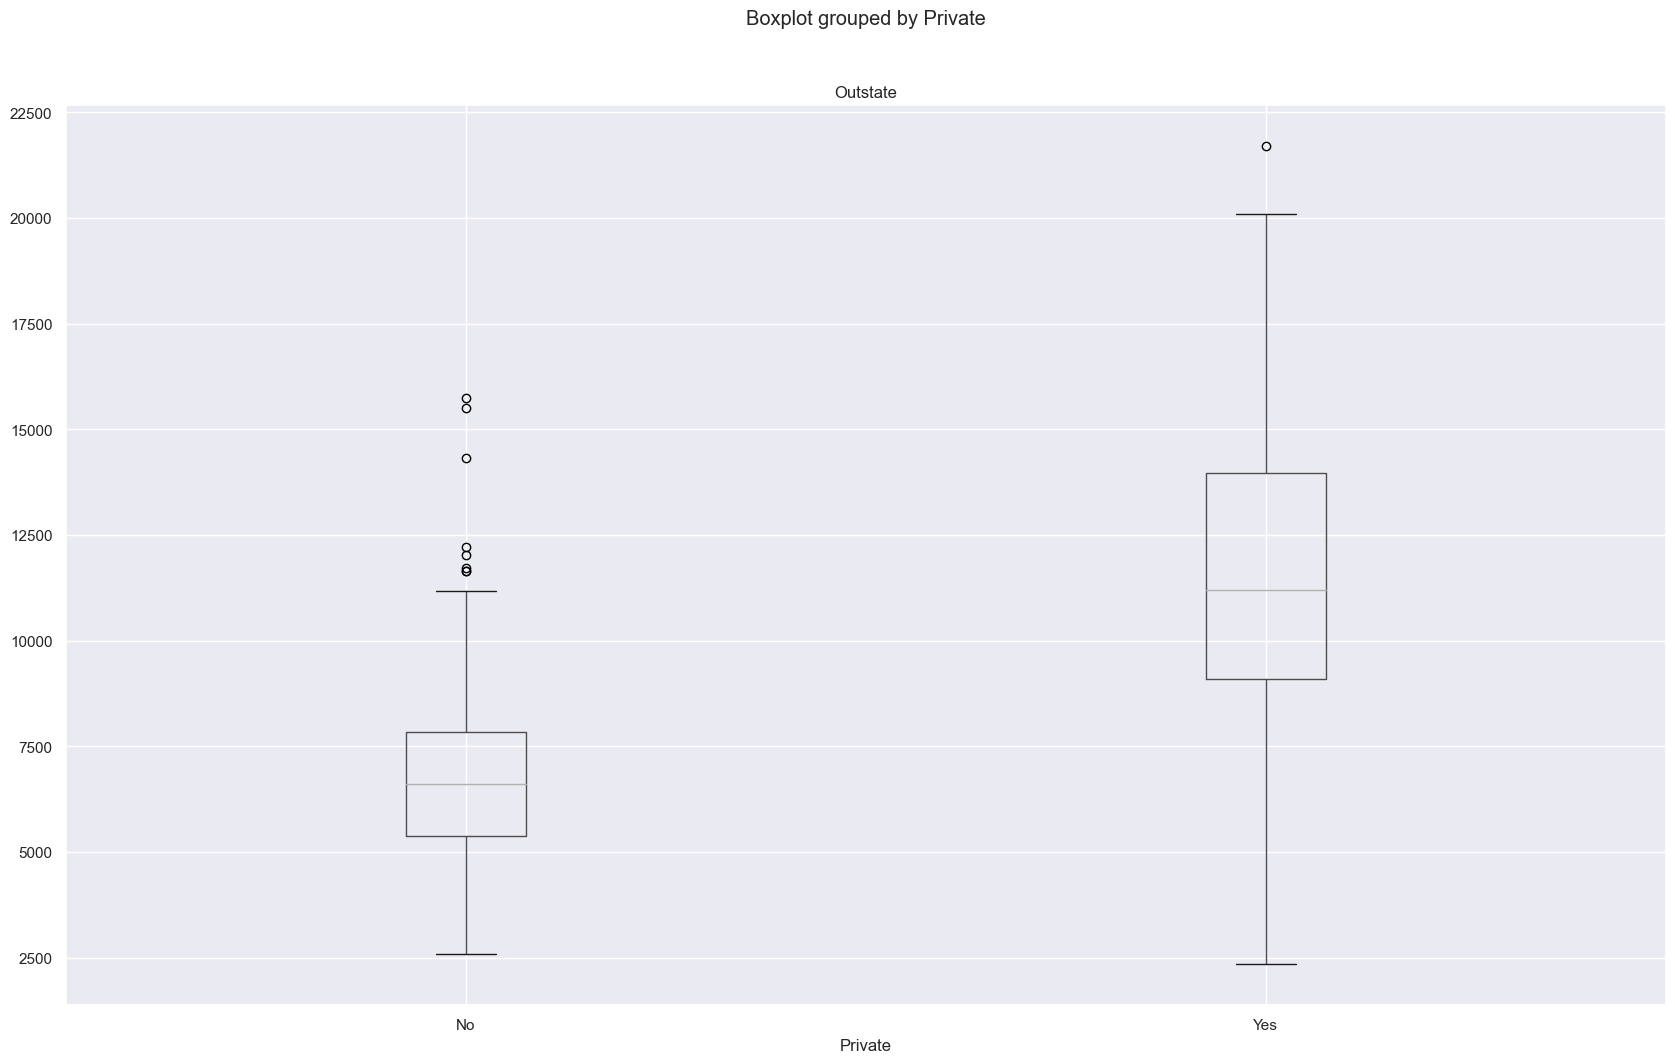

In [93]:
college.boxplot('Outstate', by = 'Private');

**(f) Crie uma nova variável qualitativa, chamada Elite, agrupando a variável Top10perc em dois grupos com base em se a proporção de alunos vindos do top 10% de suas turmas do ensino médio excede 50%.**

In [20]:
college['Elite'] = pd.cut(college['Top10perc'], [0,50,100], labels=['No', 'Yes'])

In [21]:
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

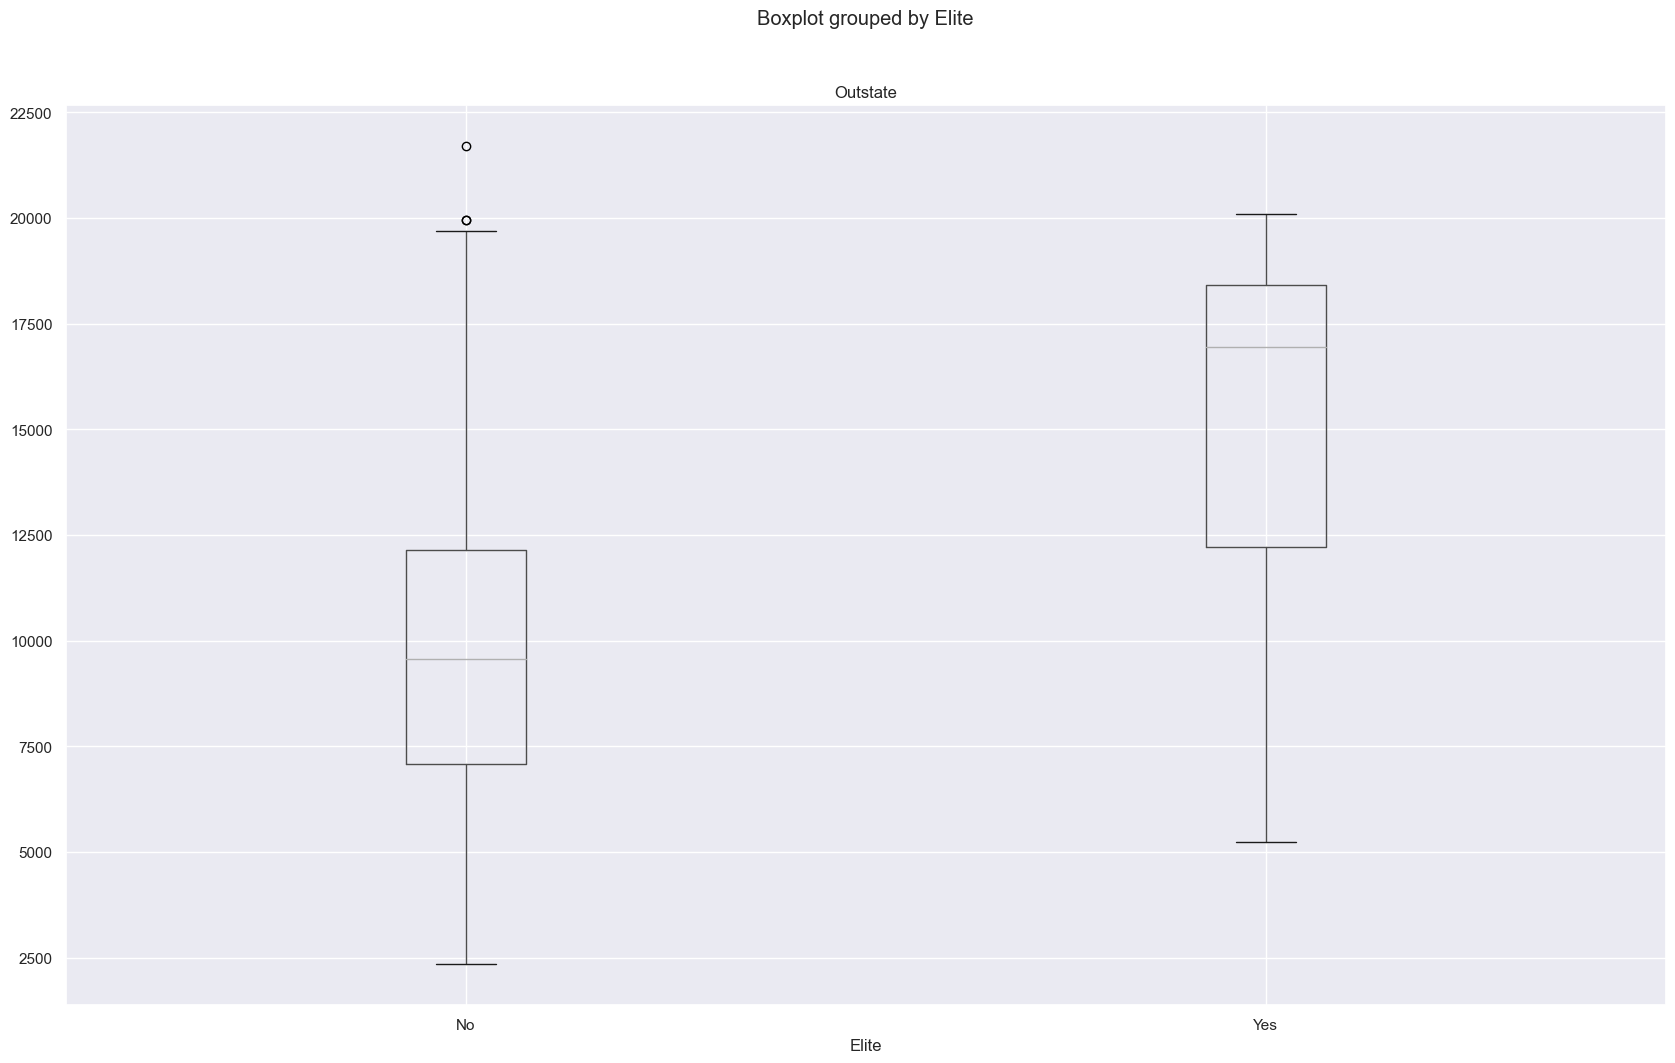

In [94]:
college.boxplot(column='Outstate', by='Elite')


**(g) Utilize o método plot.hist() do dataframe college para criar alguns histogramas com diferentes números de bins para algumas das variáveis quantitativas. O comando plt.subplots(2, 2) pode ser útil: ele dividirá a janela do gráfico em quatro regiões para que quatro gráficos possam ser criados simultaneamente. Ao alterar os argumentos, você pode dividir a tela em outras combinações.**

In [23]:
college.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate', 'Elite'],
      dtype='object')

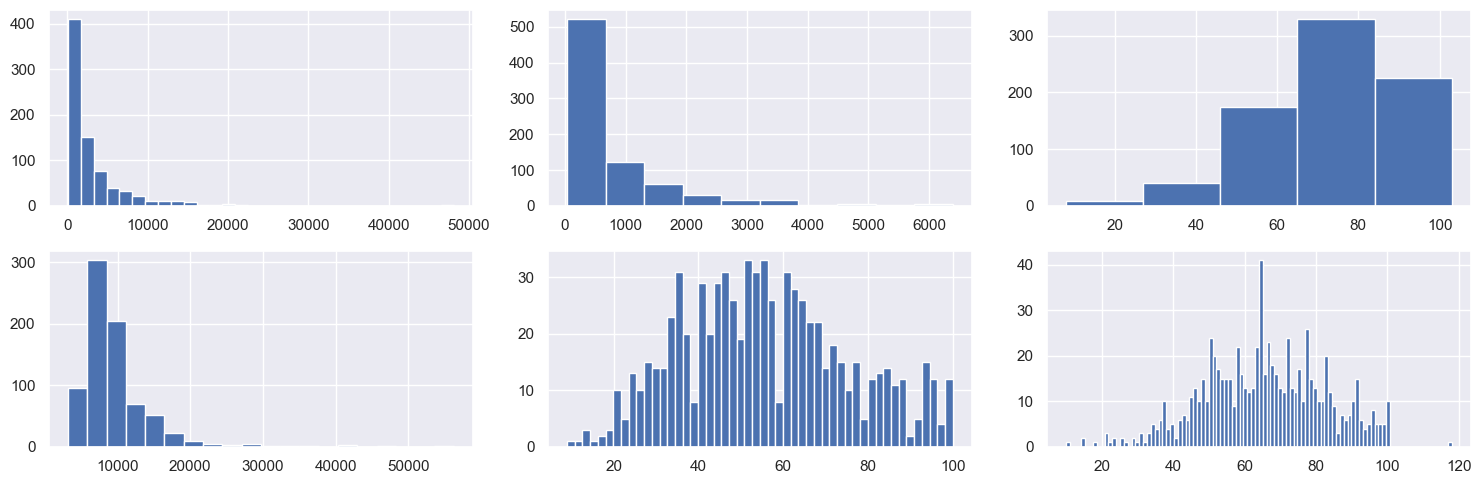

In [95]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))
axes[0, 0].hist(college['Apps'], bins=30)
axes[0, 1].hist(college['Enroll'], bins = 10)
axes[0, 2].hist(college['PhD'], bins = 5)
axes[1, 0].hist(college['Expend'], bins = 20)
axes[1, 1].hist(college['Top25perc'], bins = 50)
axes[1, 2].hist(college['Grad.Rate'], bins = 100)
plt.tight_layout()


**9.  Este exercício envolve o conjunto de dados Auto estudado no laboratório. Certifique-se de que os valores ausentes tenham sido removidos dos dados.**

**(a) Quais dos preditores são quantitativos e quais são qualitativos?**

In [26]:
auto = pd.read_csv('Auto.data', delim_whitespace=True)
auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [27]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [28]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [29]:
numeric_values = pd.to_numeric(auto['horsepower'], errors='coerce')
non_numeric_values = auto[pd.isna(numeric_values)]['horsepower']

print(non_numeric_values)

32     ?
126    ?
330    ?
336    ?
354    ?
Name: horsepower, dtype: object


In [30]:
auto['horsepower'] = auto['horsepower'].replace('?', pd.NA)

In [31]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [32]:
auto = auto.dropna()

In [46]:
auto['horsepower'] = auto['horsepower'].astype(float)

- Qualitativo: name e origin, todo o resto é quantitativo.

**(b) Qual é a amplitude de cada preditor quantitativo? Você pode responder a isso usando os métodos min() e max() em numpy.**



In [49]:
auto_quantitativa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 24.5 KB


In [48]:
auto_quantitativa = auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'year']]

In [51]:
print('A amplitude das variáveis quantitativas é:')
auto_quantitativa.max() - auto_quantitativa.min()

A amplitude das variáveis quantitativas é:


mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
year              12.0
dtype: float64

**(c) Qual é a média e o desvio padrão de cada preditor quantitativo?**

In [56]:
print('A média é:')
print(auto_quantitativa.mean())
print('O desvio padrão é:')
print(auto_quantitativa.std())

A média é:
mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
dtype: float64
O desvio padrão é:
mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
year              3.683737
dtype: float64


**(d) Agora, remova as observações da 10ª à 85ª. Qual é a amplitude, média e desvio padrão de cada preditor no subconjunto de dados que perman**ece?




In [73]:
auto_drop = auto.drop(auto.index[9:85])
auto_drop_q = auto_drop[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'year']]

In [74]:
print('A amplitude das variáveis quantitativas é:')
auto_drop_q.max() - auto_drop_q.min()

A amplitude das variáveis quantitativas é:


mpg               35.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3348.0
acceleration      16.3
year              12.0
dtype: float64

In [75]:
print('A média é:')
print(auto_drop_q.mean())
print('O desvio padrão é:')
print(auto_drop_q.std())

A média é:
mpg               24.404430
cylinders          5.373418
displacement     187.240506
horsepower       100.721519
weight          2935.971519
acceleration      15.726899
year              77.145570
dtype: float64
O desvio padrão é:
mpg               7.867283
cylinders         1.654179
displacement     99.678367
horsepower       35.708853
weight          811.300208
acceleration      2.693721
year              3.106217
dtype: float64


**(e) Usando o conjunto de dados completo, investigue os preditores graficamente, usando gráficos de dispersão ou outras ferramentas de sua escolha. Crie alguns gráficos que destaquem as relações entre os preditores. Comente sobre suas descobertas.**


- Primeiro fiz uma matriz de correlação. Vemos que weight, horsepower, displacement e cylinders são altamente correlacionados com mpg.
- Vendo a alta correlação fiz algumas matrizes que permitem  ver de maneiras mais clara a relação entre as variáveis numéricas.

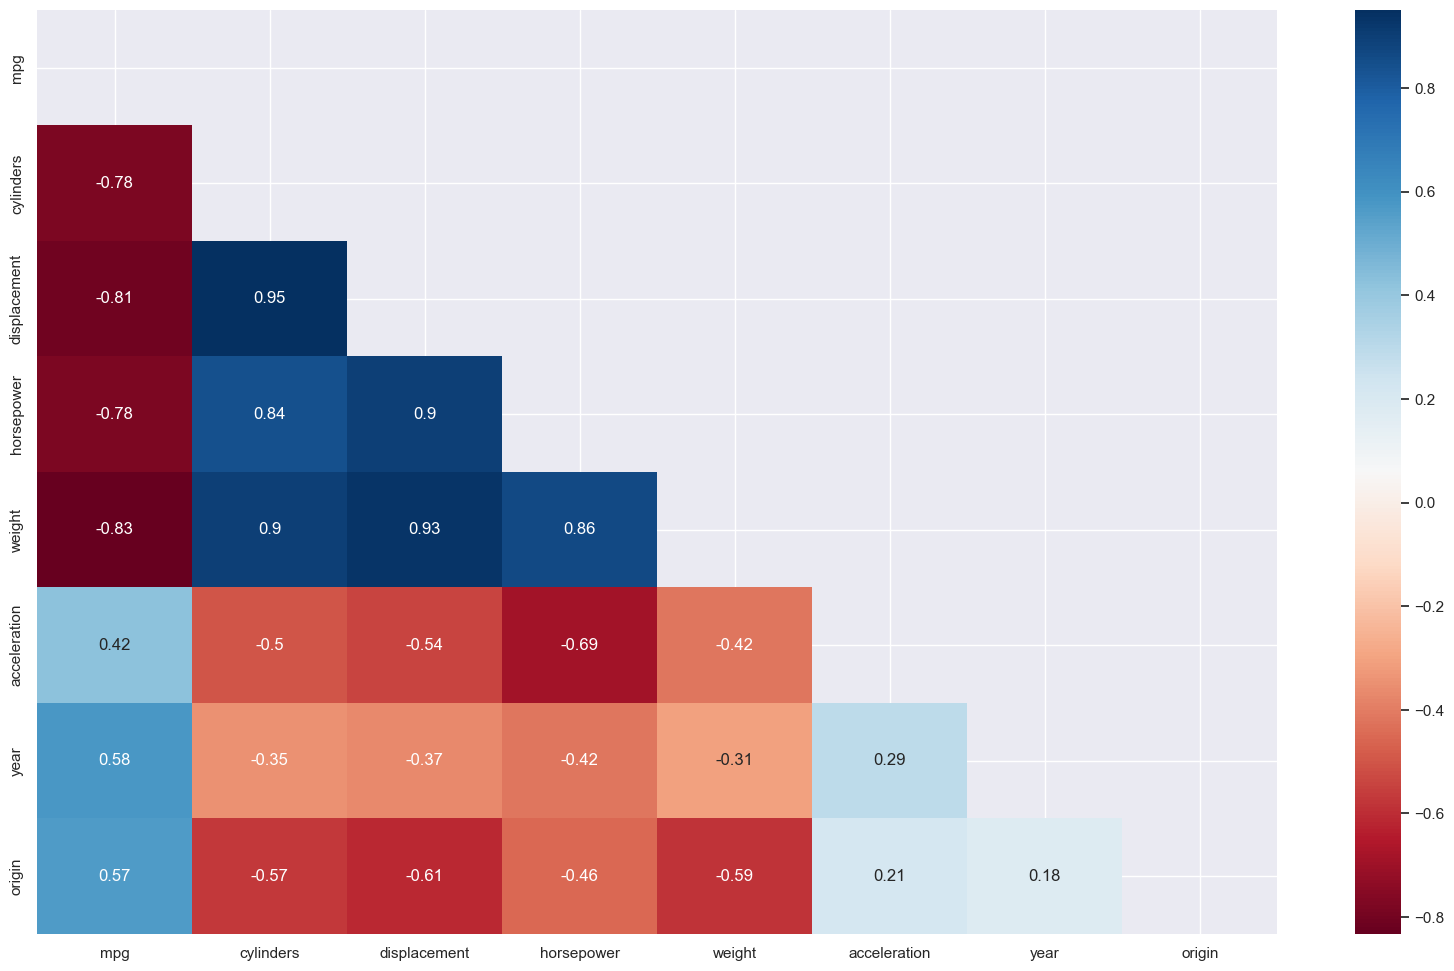

In [91]:
mask = np.triu(np.ones_like(auto.corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(20, 12)})
sns.heatmap(auto.corr(), mask=mask,  annot=True, cmap='RdBu')
plt.show()


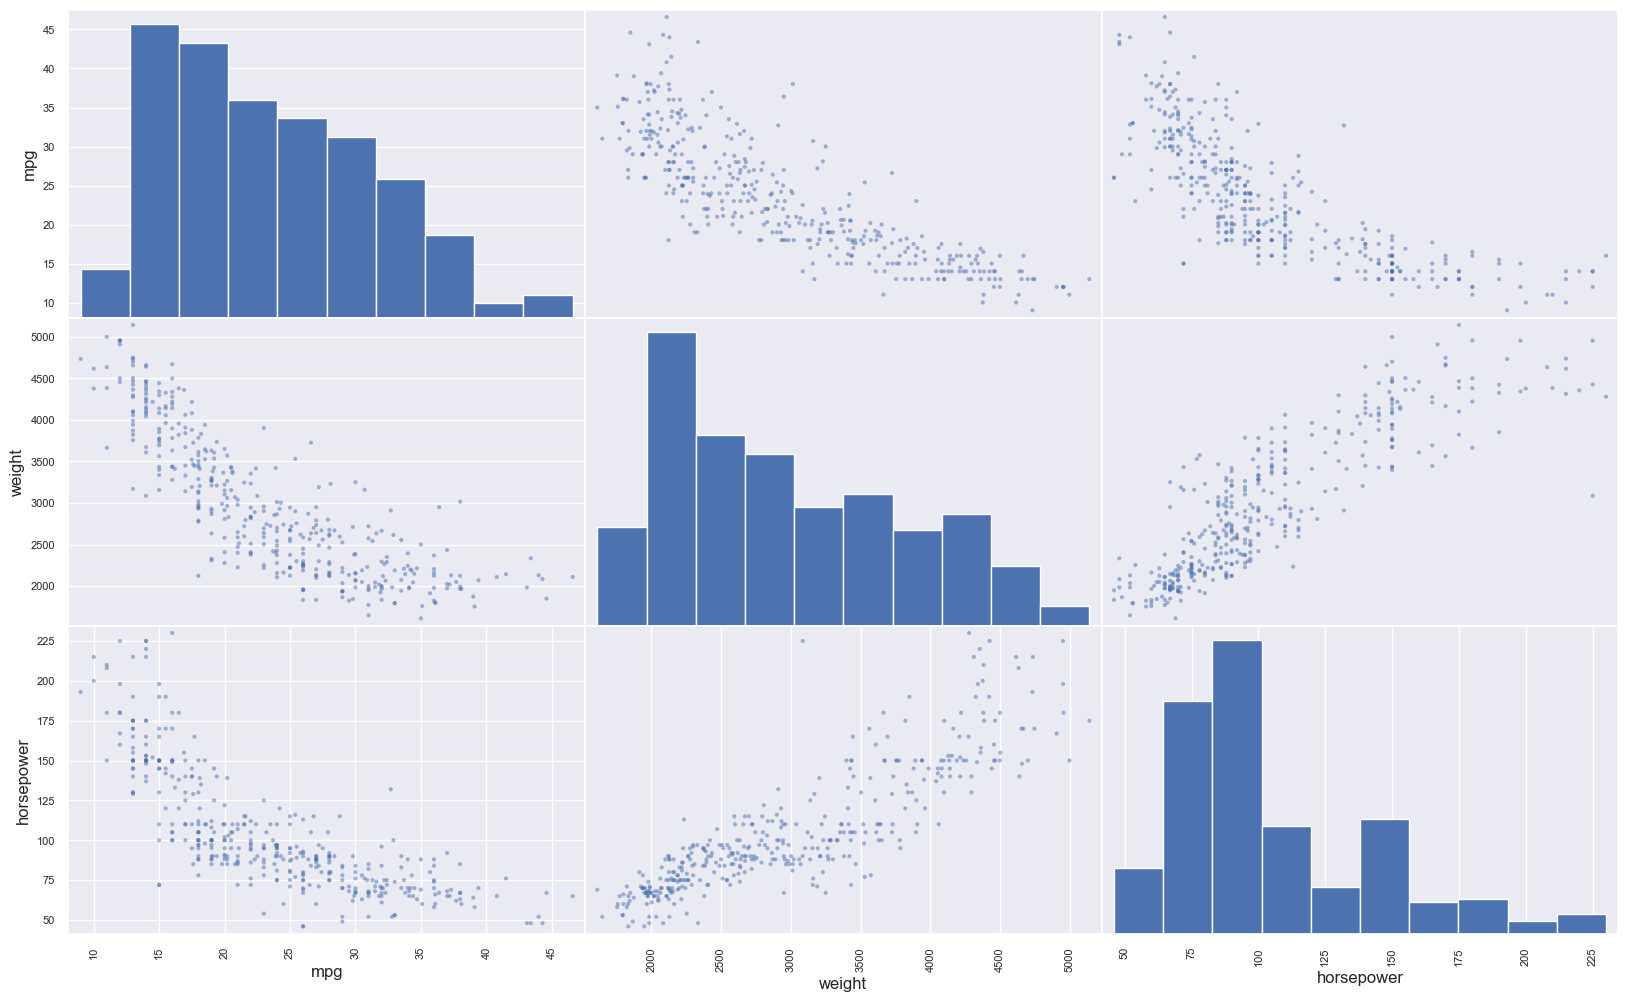

In [89]:
pd.plotting.scatter_matrix(auto[['mpg', 'weight', 'horsepower']])
plt.show()


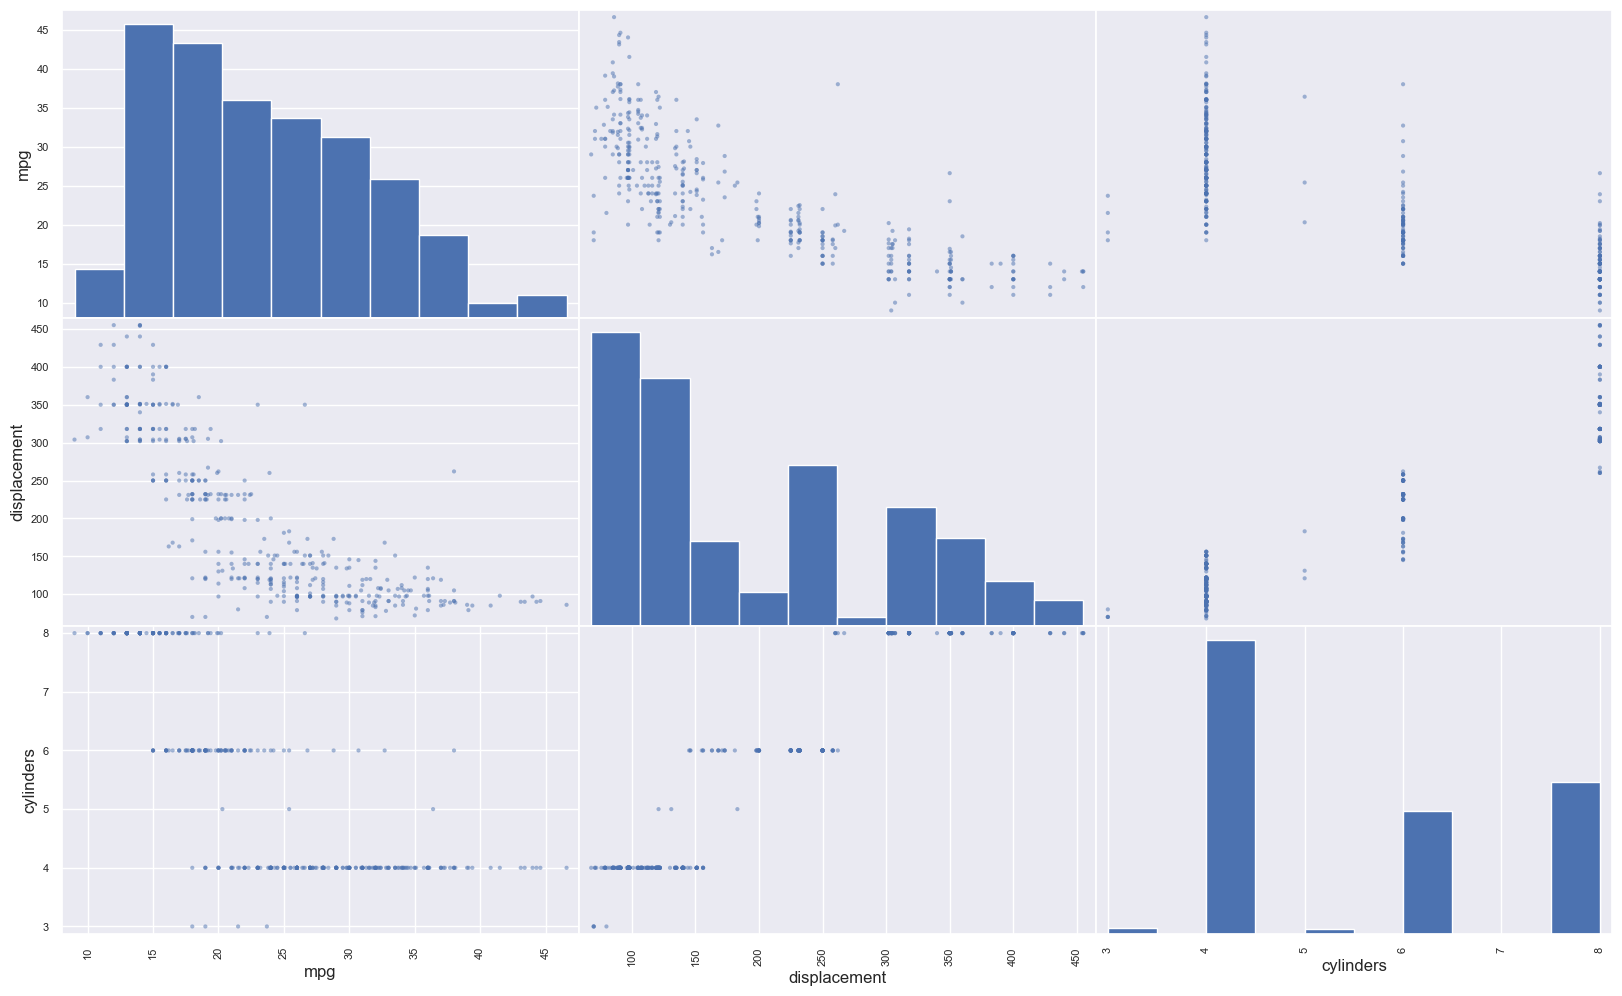

In [90]:
pd.plotting.scatter_matrix(auto[['mpg', 'displacement', 'cylinders']])
plt.show()


- Tanto o grafico de correlação quanto os gráficos de dispersão indicam que mpg é negativamente correlacionada com horsepower, com weight e com displacement.
- Horsepower é positivamente correlacionado com weight.
- As relações parecem ser lineares.

**(f) Suponha que desejamos prever o consumo de combustível (mpg) com base nas outras variáveis. Os seus gráficos sugerem que alguma das outras variáveis podem ser úteis na previsão de mpg? Justifique sua resposta.**

As variáveis que possuem alta correlação paracem ser boas indicadores para previsão de mpg.  Assim, pode-se concluir que as variáveis "weight", "horsepower", "displacement" e "cylinders" são candidatas potencialmente úteis para incluir em um modelo de previsão de consumo de combustível. 

**10. Este exercício envolve o conjunto de dados de habitação de Boston.**

**(a) Para começar, carregue o conjunto de dados de Boston, que faz parte da biblioteca ISLP.**

In [101]:
from ISLP import load_data
boston = load_data('Boston')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**(b) Quantas linhas há neste conjunto de dados? Quantas colunas? O que as linhas e colunas representam?**


In [102]:
boston.shape

(506, 13)

- 506 linhas e 13 colunas

Dicionário:

- `crim`: taxa de criminalidade per capita por cidade.

- `zn`: proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados.

- `indus`: proporção de acres de negócios não comerciais por cidade.

- `chas`: variável fictícia do rio Charles (= 1 se o bairro faz fronteira com o rio; 0 caso contrário).

- `nox`: concentração de óxidos de nitrogênio (partes por 10 milhões).

- `rm`: número médio de cômodos por habitação.

- `age`: proporção de unidades ocupadas por proprietários construídas antes de 1940.

- `dis`: média ponderada das distâncias para cinco centros de emprego de Boston.

- `rad`: índice de acessibilidade a rodovias radiais.

- `tax`: taxa de imposto sobre a propriedade de valor total por $10.000.

- `ptratio`: proporção aluno-professor por cidade.

- `lstat`: status inferior da população (percentual).

- `medv`: valor mediano das habitações ocupadas por proprietários em $1000s.

**(c) Faça alguns gráficos de dispersão em pares dos preditores (colunas) neste conjunto de dados. Descreva suas descobertas.**

In [108]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


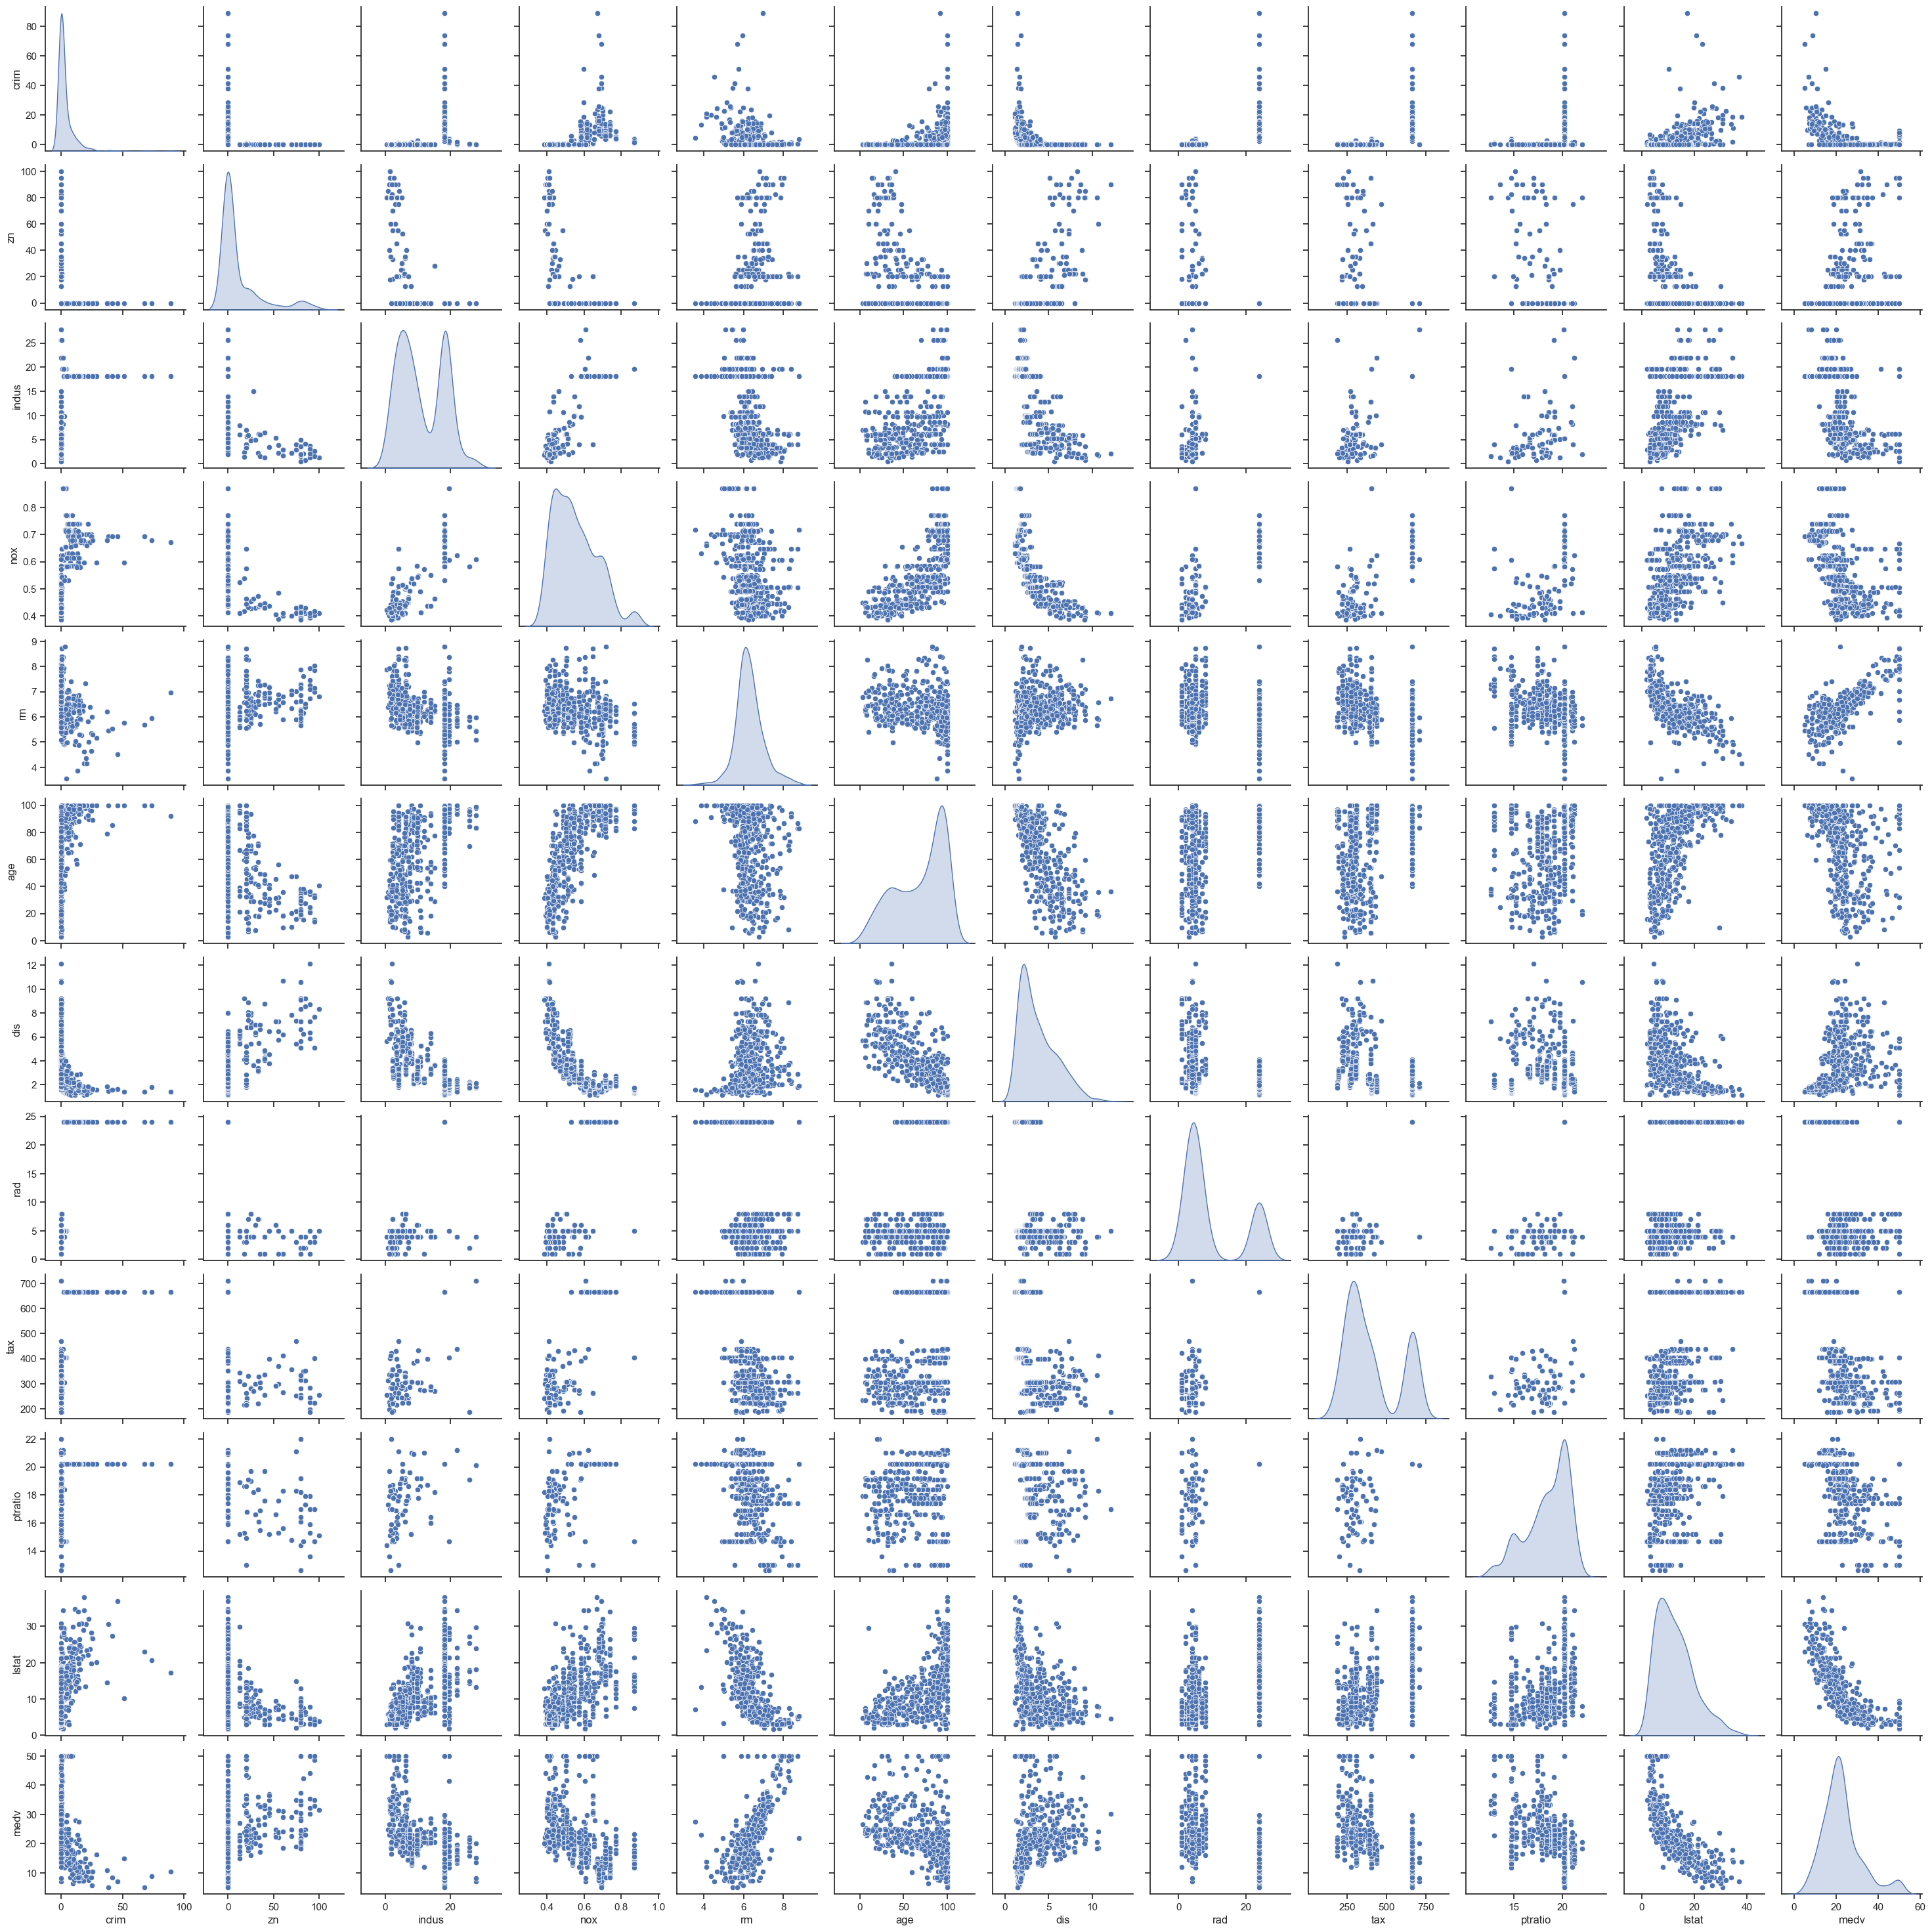

In [112]:
sns.set(style="ticks")
sns.pairplot(boston[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'lstat', 'medv']], diag_kind="kde")
plt.show()

- não parece haver relação com quase nenhuma das variáveis. 
- medv e lstat são negativamente correlacionadas
- rm e lstat são negativamente correlacionadas
- dis e nox são negativamente correlacionas


**(d) Algum dos preditores está associado à taxa de criminalidade per capita? Se sim, explique a relação.**

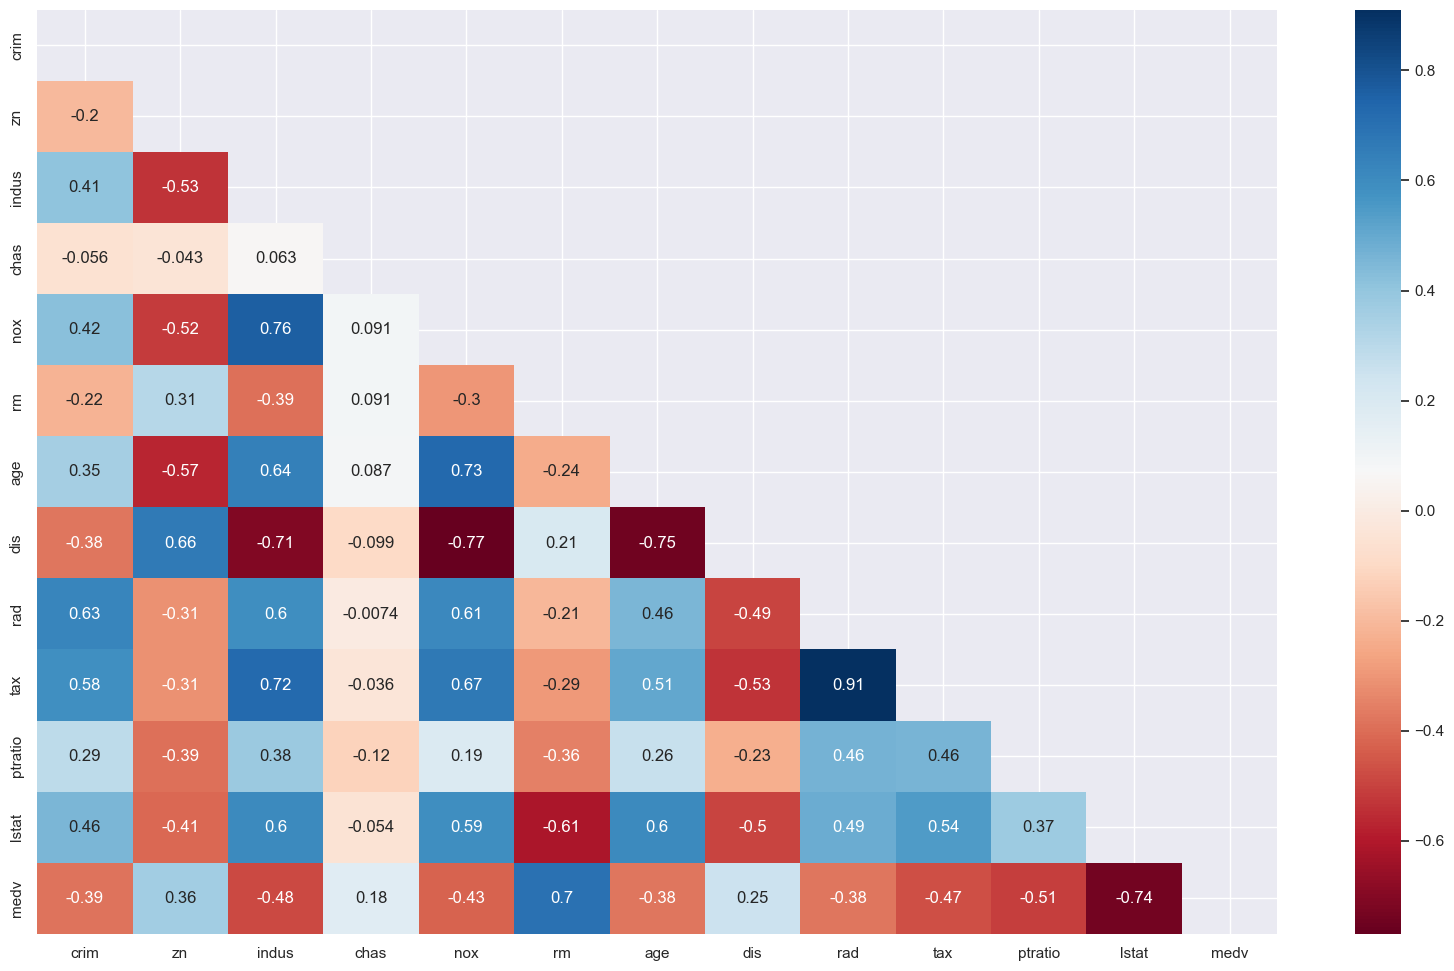

In [113]:
mask = np.triu(np.ones_like(boston.corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(20, 12)})
sns.heatmap(boston.corr(), mask=mask,  annot=True, cmap='RdBu')
plt.show()

- As correlações são bem fracas.

- A variável `crim` (per capita crime rate) tem uma correlação positiva moderada com as variáveis `indus` (proporção de acres de negócios não comerciais por cidade) e `nox` (concentração de óxidos de nitrogênio). Isso pode indicar que áreas com maior taxa de criminalidade tendem a ter maior proporção de negócios não relacionados a varejo e concentração mais alta de óxidos de nitrogênio no ar.

- A variável `crim` tem uma correlação negativa moderada com a variável `zn` (proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados). 

- A variável `crim` tem uma correlação positiva mais fraca com `tax` (taxa de imposto sobre a propriedade de valor total) e `rad` (índice de acessibilidade a rodovias radiais). Isso pode indicar que áreas com maior taxa de criminalidade tendem a ter taxas de impostos mais altas e maior acessibilidade a rodovias radiais.



**(e) Algum dos subúrbios de Boston aparenta ter taxas de criminalidade particularmente altas? Taxas de impostos? Relações aluno-professor? Comente sobre o alcance de cada preditor.**

- Pelo grafico de dispersão e pela matriz de correlação a relação entre aluno-professor e criminalidade é baixa, e parece não haver relação entre as duas variáveis.
 - A variável `crim` tem uma correlação positiva mais fraca com `tax` (taxa de imposto sobre a propriedade de valor total).  Isso pode ser visto tanto pela matriz de correlação quanto pelo gráfico de dispersão.
 - Em relação aos suburbios que tem maior taxa de criminalidade, como cada linha representa um dos subúrbios, o primeiro passo é ordenar o dataset por criminalida do maior para o menor e mostramos os 5 suburbios com a maior taxa de criminalidade:

In [123]:
boston['crim'].sort_values(ascending=False).head(5)

380    88.9762
418    73.5341
405    67.9208
410    51.1358
414    45.7461
Name: crim, dtype: float64

- Para vermos de maneira mais detalhada, podemos calcular a média e o desvio padrão da variável 'crim' (taxa de criminalidade) em todo o conjunto de dados.
Assim, identificammos os subúrbios que têm taxas de criminalidade acima da média + 2 desvios padrão. Esses subúrbios podem ser considerados como tendo taxas de criminalidade particularmente altas.

In [119]:
# Calcule a média e o desvio padrão da variável 'crim'
mean_crim = boston['crim'].mean()
std_crim = boston['crim'].std()

# Identifique os subúrbios com taxas de criminalidade particularmente altas
high_crim_suburbs = boston[boston['crim'] > mean_crim + 2 * std_crim]

high_crim_suburbs['crim'].head(4)

378    23.6482
380    88.9762
386    24.3938
387    22.5971
Name: crim, dtype: float64

**(f) Quantos dos subúrbios neste conjunto de dados fazem fronteira com o rio Charles?**

- A variável 'chas' é binária. 1 indica que o bairro faz fronteira com o rio. Dessa maneira, basta somar os valores 1 para saber quantos bairro fazem fronteiras com o rio.

In [126]:
boston['chas'].sum()

35

- 35 bairros fazem fronteira com o rio Charles.


**(g) Qual é a mediana da relação aluno-professor entre as cidades neste conjunto de dados?**

In [128]:
boston['ptratio'].median()

19.05

**(h) Qual subúrbio de Boston possui o menor valor médio de casas ocupadas pelo proprietário? Quais são os valores dos outros preditores para esse subúrbio, e como esses valores se comparam com os intervalos gerais para esses preditores? Comente sobre suas descobertas.**

In [132]:
boston['medv'].sort_values().head(3)

398    5.0
405    5.0
400    5.6
Name: medv, dtype: float64

In [134]:
min = boston.loc[[398, 405]]
min


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


- Os suburbios 398 e 405 possuem o menor valor médio de casas ocupadas pelo proprietário

**(i) Neste conjunto de dados, quantos dos subúrbios têm, em média, mais de sete quartos por habitação? Mais de oito quartos por habitação? Comente sobre os subúrbios que têm, em média, mais de oito quartos por habitação.**

In [135]:
# Número de subúrbios com mais de sete quartos por habitação
suburbs_more_than_seven_rooms = boston[boston['rm'] > 7].shape[0]

# Número de subúrbios com mais de oito quartos por habitação
suburbs_more_than_eight_rooms = boston[boston['rm'] > 8].shape[0]

print(f"Número de subúrbios com mais de sete quartos por habitação: {suburbs_more_than_seven_rooms}")
print(f"Número de subúrbios com mais de oito quartos por habitação: {suburbs_more_than_eight_rooms}")


Número de subúrbios com mais de sete quartos por habitação: 64
Número de subúrbios com mais de oito quartos por habitação: 13
